### Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions.                

##### Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations              
2. Write code comments wherever required for code understanding     

Insights to be drawn -                                                                                  
● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season1 ratings, season 2, and so on.                                                                      
● Get all the episode names, whose average rating is more than 8 for every season                               
● Get all the episode names that aired before May 2019                                            
● Get the episode name from each season with the highest and lowest rating                             
● Get the summary for the most popular ( ratings ) episode in every season                              

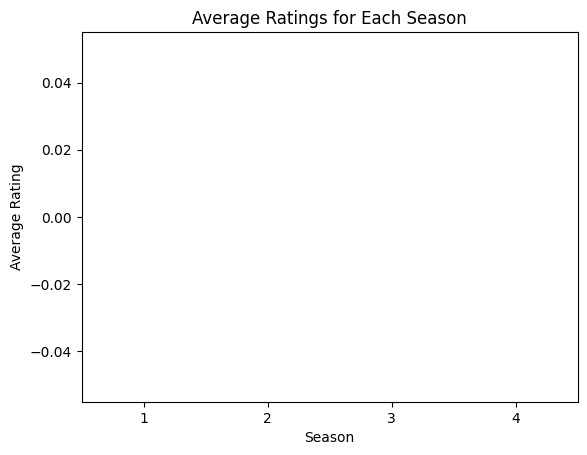

Episode Names with Average Rating > 8:
Series([], Name: name, dtype: object) 

Episode Names Aired Before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object


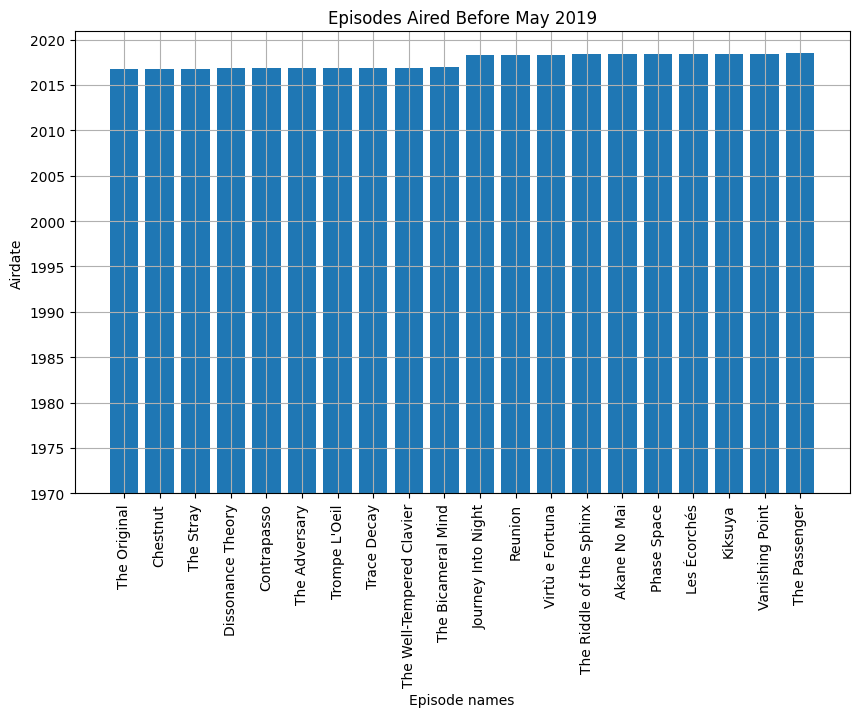

Episode with Highest Rating from Each Season:
Empty DataFrame
Columns: [season, name]
Index: []

Episode with Lowest Rating from Each Season:
Empty DataFrame
Columns: [season, name]
Index: [] 

Summary for the Most Popular Episode in Each Season:


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data for the TV show "Westworld"
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Extract the episodes data
episodes = data['_embedded']['episodes']

# Convert the episodes data into a DataFrame
df = pd.DataFrame(episodes)

# Convert the 'rating' column to numeric type
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert the airdate column to datetime format for easier filtering
df['airdate'] = pd.to_datetime(df['airdate'], errors='coerce')

# Get all the overall ratings for each season
season_ratings = df.groupby('season')['rating'].mean()

# Plotting the ratings for each season 
# The plot is appearing blank because the rating values are NULL for all the seasons.
season_ratings.plot(kind='bar', xlabel='Season', ylabel='Average Rating', title='Average Ratings for Each Season')
plt.xticks(rotation=0)
plt.show()

# Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = df.groupby(['season', 'name']).filter(lambda x: x['rating'].mean(skipna=True) > 8)['name']

# Print the episode names
# ALL the rating values is null in the datafarame, so output is appearing blank.
print("Episode Names with Average Rating > 8:")
print(high_rated_episodes, '\n')

# Get episode names aired before May 2019
episodes_before_2019 = df[df["airdate"] < pd.to_datetime("2019-05-01")]
episode_names_before_2019 = episodes_before_2019["name"]
episode_airdates_before_2019 = episodes_before_2019["airdate"]

# Print the episode names
print("Episode Names Aired Before May 2019:")
print(episode_names_before_2019)

# Plot episode names aired before May 2019
plt.figure(figsize=(10, 6))
plt.bar(episode_names_before_2019, episode_airdates_before_2019)
plt.xlabel("Episode names")
plt.ylabel("Airdate")
plt.title("Episodes Aired Before May 2019")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Filter out NaN values in the 'rating' column
df_filtered = df.dropna(subset=['rating'])

# Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = df_filtered.groupby('season')['rating'].idxmax()
lowest_rated_episodes = df_filtered.groupby('season')['rating'].idxmin()

# Print the episode names
# ALL the rating values is null in the datafarame, so output is appearing blank.
print("Episode with Highest Rating from Each Season:")
print(df.loc[highest_rated_episodes, ['season', 'name']])
print("\nEpisode with Lowest Rating from Each Season:")
print(df.loc[lowest_rated_episodes, ['season', 'name']], '\n')


# Get the summary for the most popular (highest ratings) episode in every season
most_popular_episodes = df.groupby('season')['rating'].idxmax().dropna()
most_popular_episodes_summary = df.loc[most_popular_episodes, ['season', 'name', 'summary']]

# Print the episode summaries
# ALL the rating values is null in the datafarame, so output is appearing blank.
print("Summary for the Most Popular Episode in Each Season:")
for index, row in most_popular_episodes_summary.iterrows():
    print(f"Season {row['season']}: {row['name']}")
    print(row['summary'])
    print()
